In [1]:
from binpack.models import Result
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [81]:
results = Result.objects.filter(n_tiles=20)

In [82]:
results.values('score')

<QuerySet [{'score': 5.0}, {'score': 5.0}, {'score': 5.0}, {'score': 2.0}, {'score': 4.0}, {'score': 4.0}, {'score': 3.0}, {'score': 2.0}, {'score': 6.0}, {'score': 3.0}, {'score': 4.0}, {'score': 6.0}, {'score': 3.0}, {'score': 6.0}, {'score': 7.0}, {'score': 2.0}, {'score': 10.0}, {'score': 6.0}, {'score': 7.0}, {'score': 4.0}, '...(remaining elements truncated)...']>

In [83]:
avg_depth_scores = results.filter(strategy='avg_depth').values('score')
max_depth_scores = results.filter(strategy='max_depth').values('score')
scores = results.values('score', 'strategy')

In [84]:
scores_df = pd.DataFrame.from_records(scores)
avg_depth_df = pd.DataFrame.from_records(avg_depth_scores)
def score_to_int(df):
    df['score'] = df['score'].astype('int')
    return df

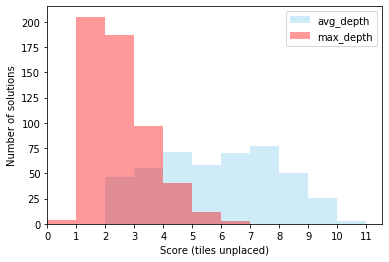

In [85]:
# scores_df
plt.figure('Results distribution')
bins = np.arange(0, 12)
sns.distplot(score_to_int(pd.DataFrame.from_records(avg_depth_scores)), kde=False, color='skyblue', label='avg_depth', bins=bins)
ax = sns.distplot(score_to_int(pd.DataFrame.from_records(max_depth_scores)), kde=False, color='red', label='max_depth', bins=bins)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xlim(left=0)
plt.ylabel('Number of solutions')
plt.xlabel('Score (tiles unplaced)')
plt.legend()
plt.show()

In [93]:
# find total scores by annotation
from django.db.models import Count
results.values('score').annotate(total_for_score=Count('score'))

<QuerySet [{'score': 10.0, 'total_for_score': 2}, {'score': 0.0, 'total_for_score': 4}, {'score': 4.0, 'total_for_score': 111}, {'score': 5.0, 'total_for_score': 70}, {'score': 2.0, 'total_for_score': 233}, {'score': 7.0, 'total_for_score': 77}, {'score': 11.0, 'total_for_score': 1}, {'score': 9.0, 'total_for_score': 26}, {'score': 3.0, 'total_for_score': 153}, {'score': 1.0, 'total_for_score': 205}, {'score': 6.0, 'total_for_score': 73}, {'score': 8.0, 'total_for_score': 50}]>

In [94]:
results.count()

1005

### Simulation runs vs score

In [34]:
s1 = set(Result.objects.filter(n_simulations=5000).values_list('their_id', flat=True))
s2 = set(Result.objects.filter(n_simulations=10000).values_list('their_id', flat=True))
s1 - s2

{22762}

{500: <QuerySet [1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 3.0, 1.0, 1.0]>, 1000: <QuerySet [1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0]>, 2000: <QuerySet [1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]>, 5000: <QuerySet [0.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0]>}
<QuerySet [1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 3.0, 1.0, 1.0]>
<QuerySet [1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0]>
<QuerySet [1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]>
<QuerySet [0.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0]>


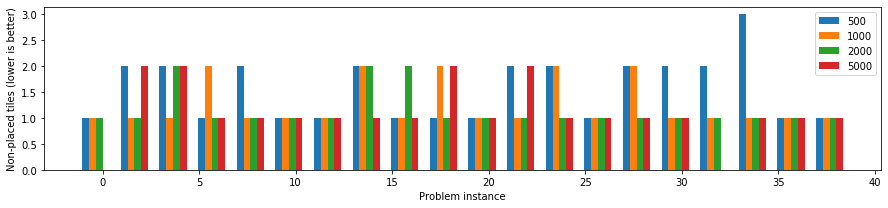

In [47]:
from collections import defaultdict
SIMULATION_RUNS = [500, 1000, 2000, 5000, 10000]
problem_ids = Result.objects.filter(n_simulations=5000).order_by('their_id').values_list('their_id', flat=True)
x_vals = defaultdict(list)
results = {}

plt.rcParams["figure.figsize"] = (15,3)

for n_simulations in SIMULATION_RUNS:
    s1 = Result.objects.filter(
        their_id__in=problem_ids,
        strategy='max_depth',
        n_simulations=n_simulations).order_by('their_id').values_list('score', flat=True)
    results[n_simulations] = s1
    
fig = plt.figure()
x = np.arange(0, len(problem_ids)* 2, 2)
width_offset = 0.35
width = - width_offset * 2.5 
for n_simulations, result in results.items():
    print(result)
    plt.bar(x + width, result, width=width_offset, label=n_simulations)
    width += width_offset
   
plt.xlabel('Problem instance')
plt.ylabel('Non-placed tiles (lower is better)')
plt.legend()
print('Number of tiles non-placed in correlation with simulation runs')
plt.show()

### Tiles placed (Huristic vs MCTS)

In [54]:
instances_where_solution_is_found = Result.objects.filter(solution_found=True, n_tiles=20).values('n_tiles_placed', 'their_tiles_placed')
scores_df = pd.DataFrame.from_records(instances_where_solution_is_found)
scores_df

,n_tiles_placed,their_tiles_placed
0,1022985,7629
1,805259,481
2,1013841,220
3,5309083,548
4,6586459,196
